In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [16]:
filename="../data/hurricane_vessel_dataset_unique_encoded.csv"
df = pd.read_csv(filename)

In [17]:
df.head(10)

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,...,50-knot Wind Radii NE,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,PathChange
0,255805914.0,34.70562,-75.60953,16.2,52.8,55.0,70.0,0.0,332.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
1,636017112.0,39.42750,-75.52683,14.7,318.0,319.0,70.0,0.0,208.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
2,249922000.0,41.58462,-71.28670,0.0,143.2,511.0,70.0,15.0,225.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,0
3,220379000.0,36.92358,-75.92110,6.2,305.6,302.0,70.0,0.0,367.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
4,366235000.0,32.84996,-79.93852,0.0,0.0,58.0,70.0,5.0,207.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
5,366203000.0,36.86570,-76.31572,0.0,38.6,511.0,70.0,5.0,250.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,0
6,308371000.0,35.93562,-74.45473,15.0,18.0,13.0,80.0,0.0,213.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
7,636013274.0,40.63307,-74.20236,0.0,304.8,200.0,80.0,5.0,248.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
8,563000700.0,40.68342,-74.15006,0.0,282.9,309.0,70.0,0.0,334.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1
9,477598800.0,38.42842,-73.60877,14.8,357.2,1.0,72.0,0.0,366.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,1


In [18]:
df.shape

(1866, 33)

In [19]:
df.columns

Index(['MMSI', 'LAT', 'LON', 'SOG', 'COG', 'Heading', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass', 'Num Entries',
       'Status of System', 'Latitude', 'Longitude', 'Maximum Sustained Wind',
       'Minimum Pressure', '34-knot Wind Radii NE', '34-knot Wind Radii SE',
       '34-knot Wind Radii SW', '34-knot Wind Radii NW',
       '50-knot Wind Radii NE', '50-knot Wind Radii SE',
       '50-knot Wind Radii SW', '50-knot Wind Radii NW',
       '64-knot Wind Radii NE', '64-knot Wind Radii SE',
       '64-knot Wind Radii SW', '64-knot Wind Radii NW', 'Speed mph',
       'PathChange'],
      dtype='object')

In [20]:
df["PathChange"].value_counts()

PathChange
1    1457
0     409
Name: count, dtype: int64

In [21]:
# Split the data into features and target label
y = df['PathChange']
X = df.drop('PathChange', axis=1)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [23]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1492, 32)
(374, 32)
(1492,)
(374,)


In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")

svc_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.61      0.29      0.39        76
           1       0.84      0.95      0.89       298

    accuracy                           0.82       374
   macro avg       0.73      0.62      0.64       374
weighted avg       0.79      0.82      0.79       374

[[ 22  54]
 [ 14 284]]


<Axes: >

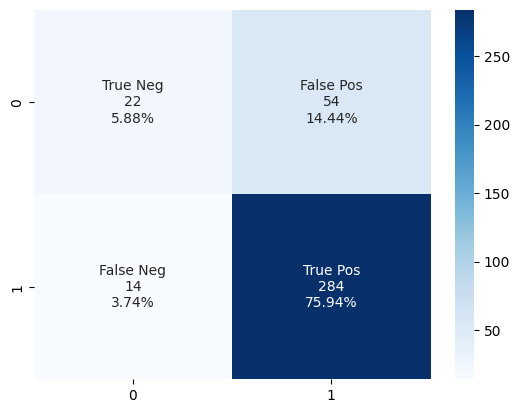

In [28]:
import seaborn as sns
import numpy as np

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')